In [1]:
import numpy as np
import matplotlib.pyplot as plt
import miepython
import pandas as pd
import PyMieScatt as ps

In [2]:
import yaml
import numpy as np

# Define the path to your YAML file
yaml_file_path = 'benzene.yml'

# Open and read the YAML file
with open(yaml_file_path, 'r') as file:
    data = yaml.safe_load(file)

# Access the tabulated data
tabulated_data = data.get('DATA')[0]  # Assuming there's only one entry in DATA

# Split the tabulated data into columns
lines = tabulated_data['data'].strip().split('\n')
columns = [line.split() for line in lines]

# Convert columns to NumPy arrays
column1 = np.array([float(entry[0]) for entry in columns])
column2 = np.array([float(entry[1]) for entry in columns])
column3 = np.array([float(entry[2]) for entry in columns])


In [3]:
def get_scattering_coefficient(wavelength, radius, refractive_index):
    sphere_param_x = 2*radius*np.pi/wavelength
    _, qsca, _, _ = miepython.mie(refractive_index,sphere_param_x)
    sigma_s = qsca*(radius)**-1

    #Verify with PyMieScatt
    for i in range(len(wavelength)):
        Qsca = ps.MieQ(refractive_index[i],wavelength[i]*1000,2*radius*1000,asDict=True)["Qsca"]
        #Relative error between qsca and Qsca
        error = abs((qsca[i]-Qsca)/Qsca)
        if error > 0.01:
            print("Error is greater than 1%")
            print(qsca[i],Qsca,wavelength[i],radius,refractive_index[i])
    return qsca, wavelength, sigma_s

In [4]:
#Convert infrared wavelengths to float from string
infrared_wavelengths = column1.astype(np.float64)
infrared_refractive_index = column2.astype(np.float64)

#Get only data where wavelength is between 1.28 and 12
indices = (infrared_wavelengths > 1.27) & (infrared_wavelengths <= 18)
infrared_wavelengths = infrared_wavelengths[indices]
infrared_refractive_index = infrared_refractive_index[indices]


visible_wavelengths = np.linspace(0.45,1.27,1000)
visible_refractive_index = (2.170184597+0.00059399*visible_wavelengths**2+0.02303464*visible_wavelengths**-2-0.000499485*visible_wavelengths**-4+0.000178796*visible_wavelengths**-6)**.5

all_wavelengths = np.concatenate((visible_wavelengths,infrared_wavelengths))
all_refractive_index = np.concatenate((visible_refractive_index,infrared_refractive_index))

In [5]:
visible_wavelengths.max()

1.27

In [6]:
infrared_wavelengths.max()

17.9889

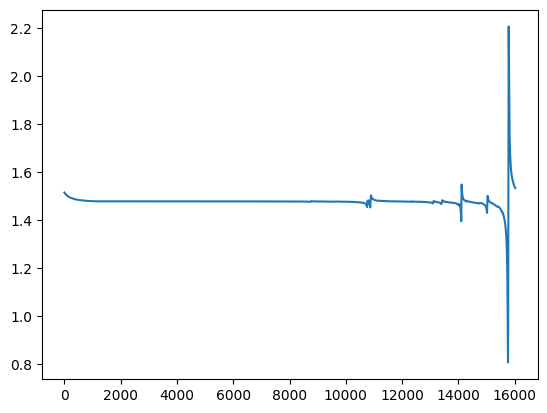

In [7]:
plt.plot(all_refractive_index)

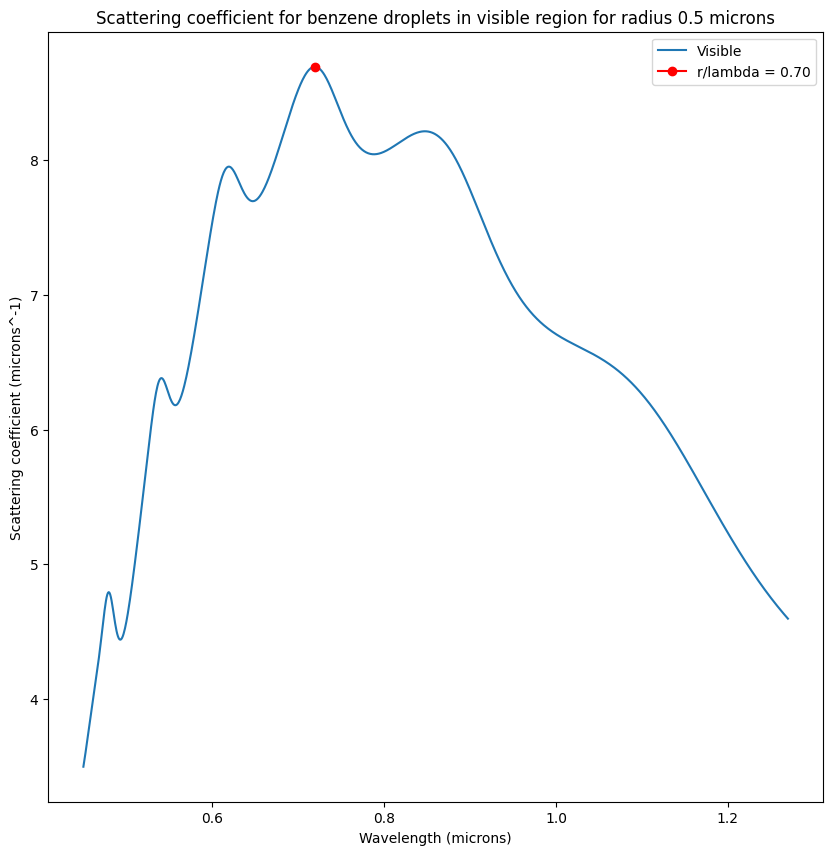

In [8]:
#Plot the scattering coefficient for visible and infrared wavelengths and all wavelengths
plt.figure(figsize=(10,10))
plt.xlabel('Wavelength (microns)')
plt.ylabel('Scattering coefficient (microns^-1)')
plt.title('Scattering coefficient for benzene droplets in visible region for radius 0.5 microns')
qsca, wavelength, sigma_s = get_scattering_coefficient(visible_wavelengths,0.5,visible_refractive_index)
plt.plot(visible_wavelengths,sigma_s,label='Visible')
#Plot maximum scattering coefficient as a red dot
plt.plot(wavelength[np.argmax(sigma_s)],sigma_s.max(),marker='o',color='red',label = f"r/lambda = {0.5/wavelength[np.argmax(sigma_s)]:.2f}")
plt.legend()
#plt.plot(infrared_wavelengths,get_scattering_coefficient(infrared_wavelengths,0.5,infrared_refractive_index)[2],label='Infrared')

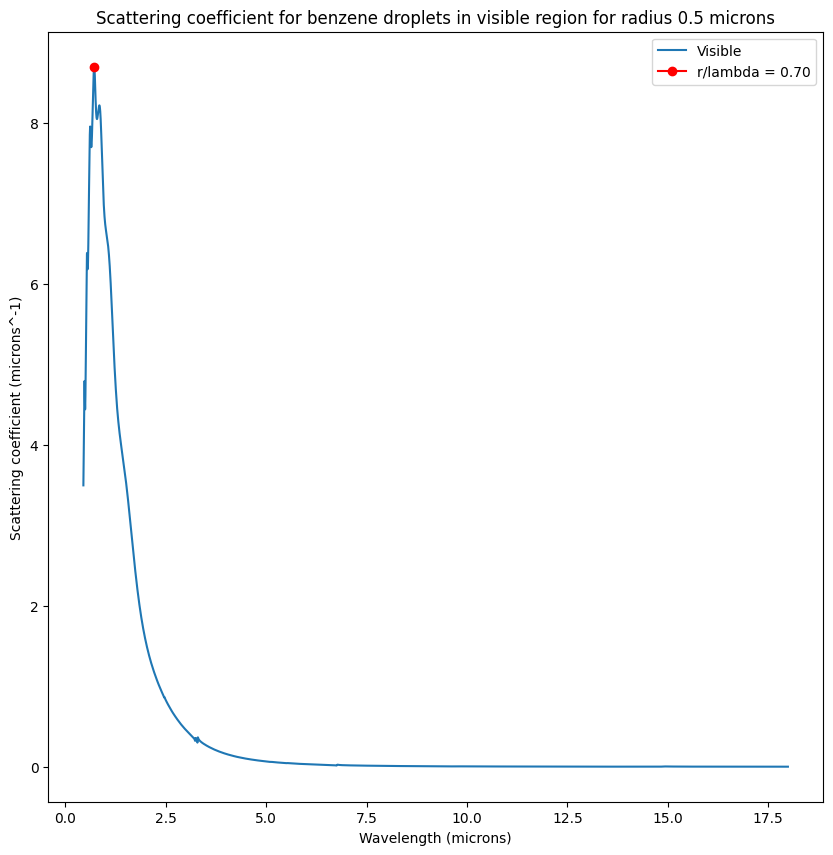

In [9]:
#Plot the scattering coefficient for visible and infrared wavelengths and all wavelengths
plt.figure(figsize=(10,10))
plt.xlabel('Wavelength (microns)')
plt.ylabel('Scattering coefficient (microns^-1)')
plt.title('Scattering coefficient for benzene droplets in visible region for radius 0.5 microns')
qsca, wavelength, sigma_s = get_scattering_coefficient(all_wavelengths,0.5,all_refractive_index)
plt.plot(all_wavelengths,sigma_s,label='Visible')
#Plot maximum scattering coefficient as a red dot
plt.plot(wavelength[np.argmax(sigma_s)],sigma_s.max(),marker='o',color='red',label = f"r/lambda = {0.5/wavelength[np.argmax(sigma_s)]:.2f}")
plt.legend()
#plt.plot(infrared_wavelengths,get_scattering_coefficient(infrared_wavelengths,0.5,infrared_refractive_index)[2],label='Infrared')

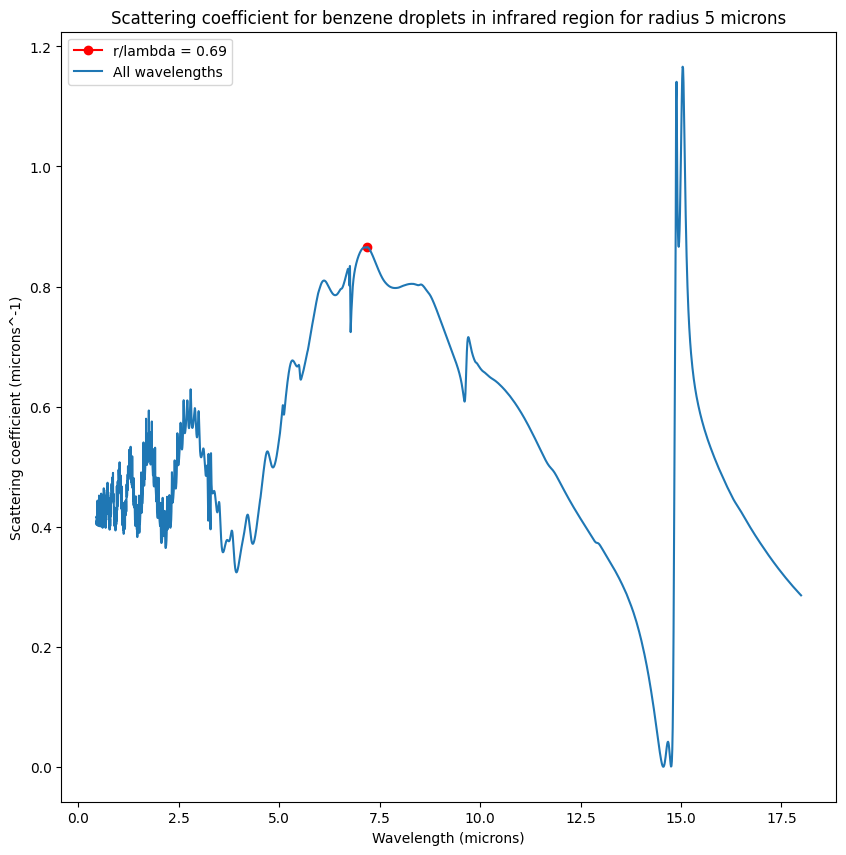

In [10]:
#Plot the scattering coefficient for all wavelengths
plt.figure(figsize=(10,10))
plt.xlabel('Wavelength (microns)')
plt.ylabel('Scattering coefficient (microns^-1)')
qsca, wavelength, sigma_s = get_scattering_coefficient(all_wavelengths,5,all_refractive_index)
#Plot maximum scattering coefficient between 5 microns and 7.5 microns as a red dot
wavelenth_val = wavelength[(wavelength > 5) & (wavelength < 7.5)]
sigma_s_val = sigma_s[(wavelength > 5) & (wavelength < 7.5)]
plt.title('Scattering coefficient for benzene droplets in infrared region for radius 5 microns')
plt.plot(wavelenth_val[np.argmax(sigma_s_val)],sigma_s_val.max(),marker='o',color='red',label = f"r/lambda = {5/wavelenth_val[np.argmax(sigma_s_val)]:.2f}")
plt.plot(all_wavelengths,sigma_s,label='All wavelengths')
plt.legend()

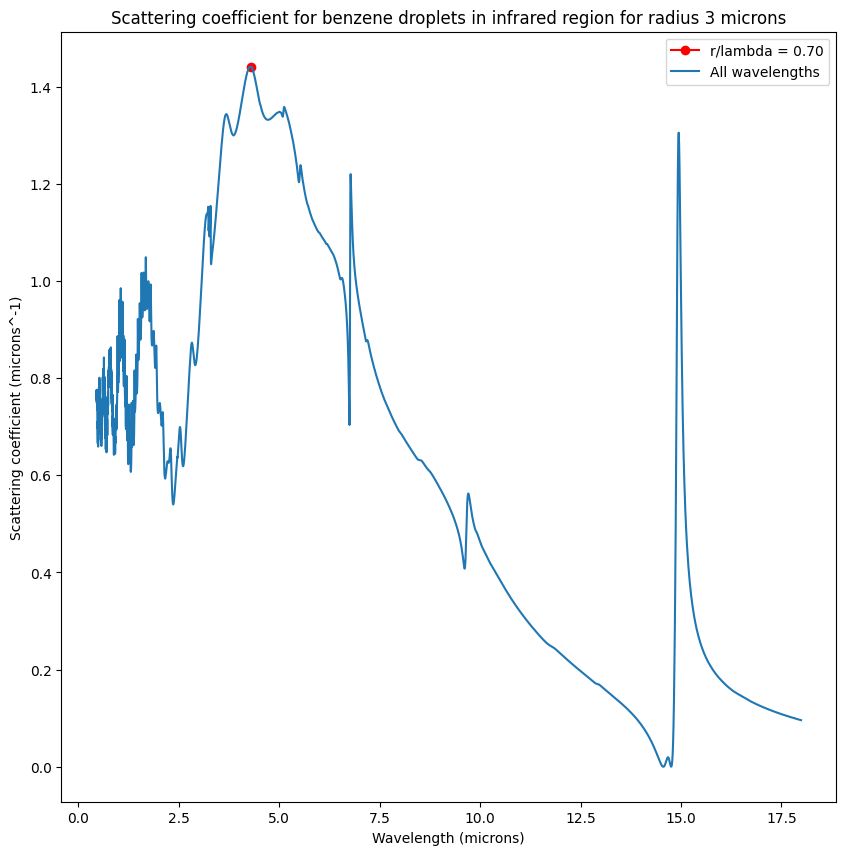

In [11]:
#Plot the scattering coefficient for all wavelengths
plt.figure(figsize=(10,10))
plt.xlabel('Wavelength (microns)')
plt.ylabel('Scattering coefficient (microns^-1)')
qsca, wavelength, sigma_s = get_scattering_coefficient(all_wavelengths,3,all_refractive_index)
#Plot maximum scattering coefficient between 2.5 microns and 5 microns as a red dot
wavelenth_val = wavelength[(wavelength > 2.5) & (wavelength < 5)]
sigma_s_val = sigma_s[(wavelength > 2.5) & (wavelength < 5)]
plt.title('Scattering coefficient for benzene droplets in infrared region for radius 3 microns')
plt.plot(wavelenth_val[np.argmax(sigma_s_val)],sigma_s_val.max(),marker='o',color='red',label = f"r/lambda = {3/wavelenth_val[np.argmax(sigma_s_val)]:.2f}")
plt.plot(all_wavelengths,sigma_s,label='All wavelengths')
plt.legend()

Error is greater than 1%
2.3225658174364545 2.2850232760727764 1.40172 10 1.47777


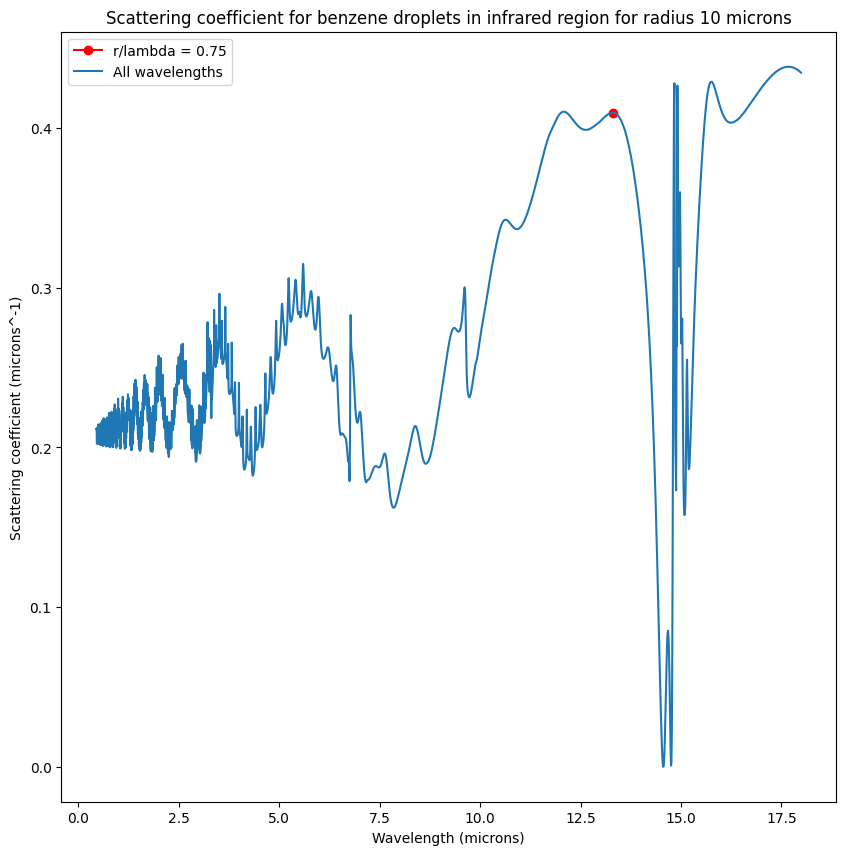

In [12]:
#Plot the scattering coefficient for all wavelengths
plt.figure(figsize=(10,10))
plt.xlabel('Wavelength (microns)')
plt.ylabel('Scattering coefficient (microns^-1)')
qsca, wavelength, sigma_s = get_scattering_coefficient(all_wavelengths,10,all_refractive_index)
#Plot maximum scattering coefficient between 2.5 microns and 5 microns as a red dot
wavelenth_val = wavelength[(wavelength > 12.5) & (wavelength < 14)]
sigma_s_val = sigma_s[(wavelength > 12.5) & (wavelength < 14)]
plt.title('Scattering coefficient for benzene droplets in infrared region for radius 10 microns')
plt.plot(wavelenth_val[np.argmax(sigma_s_val)],sigma_s_val.max(),marker='o',color='red',label = f"r/lambda = {10/wavelenth_val[np.argmax(sigma_s_val)]:.2f}")
plt.plot(all_wavelengths,sigma_s,label='All wavelengths')
plt.legend()

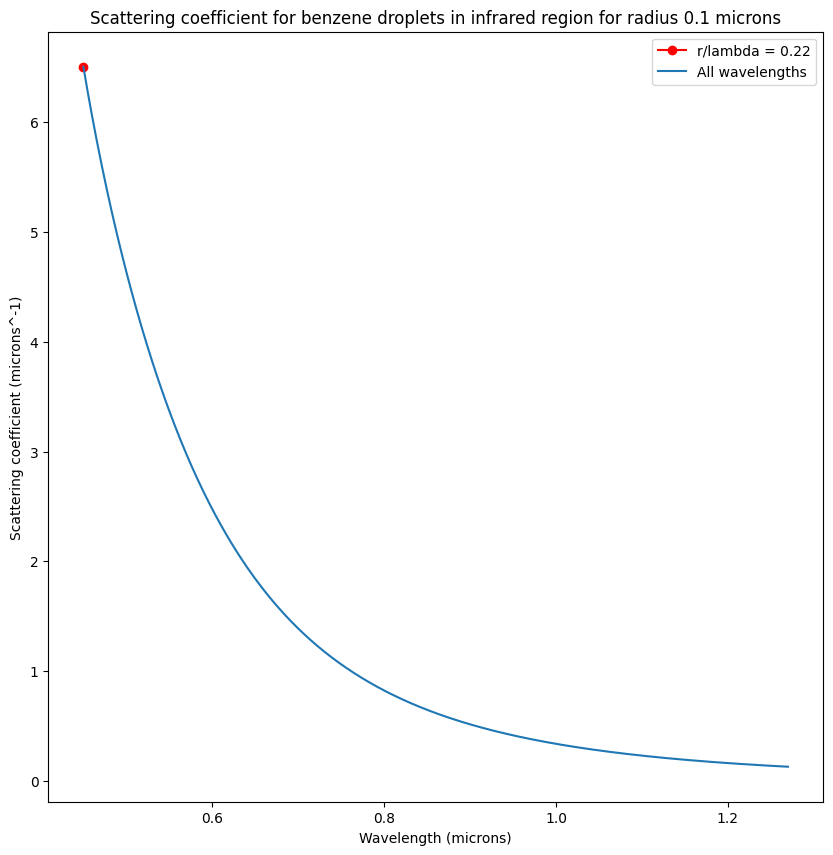

In [13]:
#Plot the scattering coefficient for all wavelengths
plt.figure(figsize=(10,10))
plt.xlabel('Wavelength (microns)')
plt.ylabel('Scattering coefficient (microns^-1)')
qsca, wavelength, sigma_s = get_scattering_coefficient(visible_wavelengths,0.1,visible_refractive_index)
#Plot maximum scattering coefficient between 2.5 microns and 5 microns as a red dot
wavelenth_val = wavelength[(wavelength > 0) & (wavelength < 14)]
sigma_s_val = sigma_s[(wavelength > 0) & (wavelength < 14)]
plt.title('Scattering coefficient for benzene droplets in infrared region for radius 0.1 microns')
plt.plot(wavelenth_val[np.argmax(sigma_s_val)],sigma_s_val.max(),marker='o',color='red',label = f"r/lambda = {0.1/wavelenth_val[np.argmax(sigma_s_val)]:.2f}")
plt.plot(wavelength,sigma_s,label='All wavelengths')
plt.legend()

In [14]:
np.mean(all_refractive_index)


1.4770179888547592

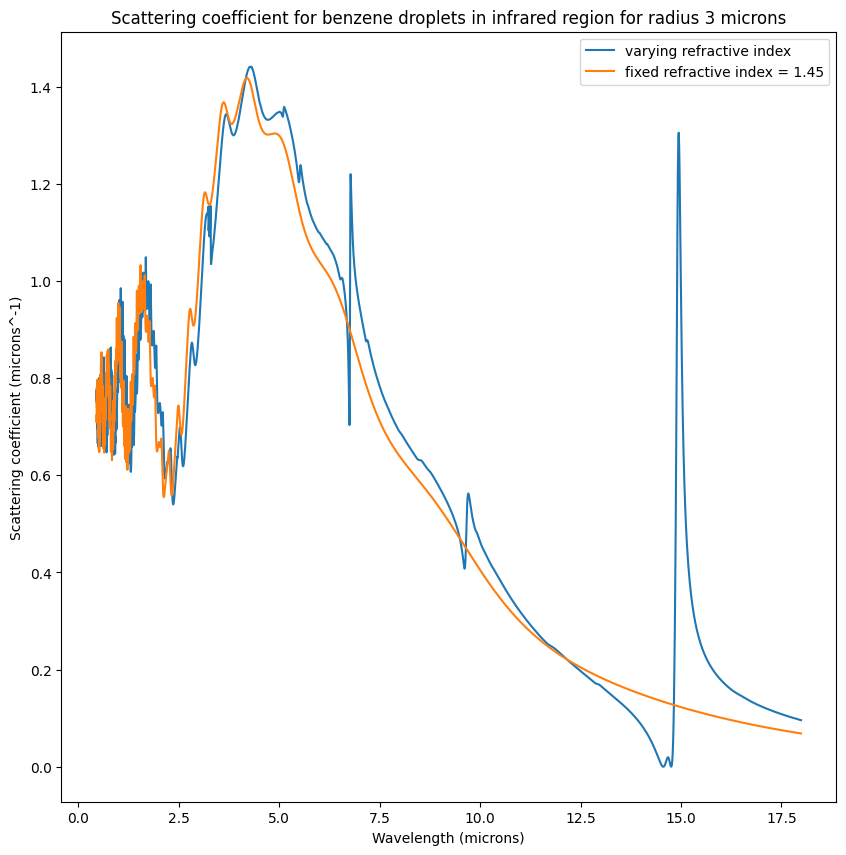

In [15]:
#Plot the scattering coefficient for all wavelengths
plt.figure(figsize=(10,10))
plt.xlabel('Wavelength (microns)')
plt.ylabel('Scattering coefficient (microns^-1)')

qsca, wavelength, sigma_s = get_scattering_coefficient(all_wavelengths,3,all_refractive_index)
#all_refractive_index is a numpy array with a fixed value for all wavelengths
constant_refractive_index = np.full(len(all_wavelengths),1.45)
qsca_1, wavelength_1, sigma_s_1 = get_scattering_coefficient(all_wavelengths,3,constant_refractive_index)
#Plot maximum scattering coefficient between 2.5 microns and 5 microns as a red dot
plt.title('Scattering coefficient for benzene droplets in infrared region for radius 3 microns')
plt.plot(all_wavelengths,sigma_s,label='varying refractive index')
plt.plot(all_wavelengths,sigma_s_1,label='fixed refractive index = 1.45')
plt.legend()

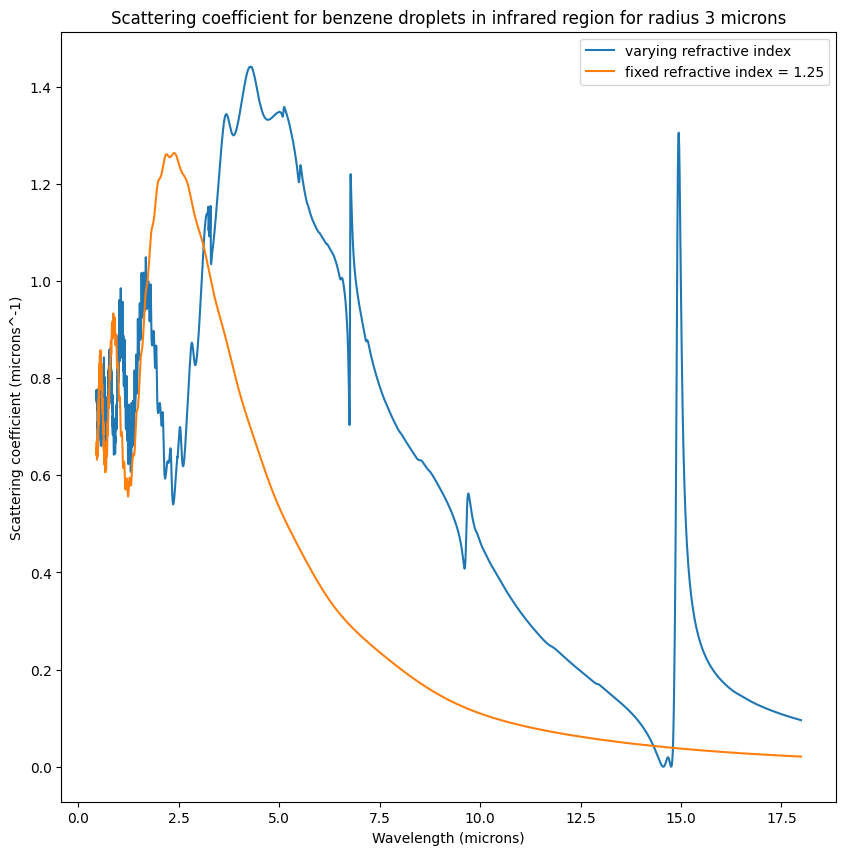

In [16]:
#Plot the scattering coefficient for all wavelengths
plt.figure(figsize=(10,10))
plt.xlabel('Wavelength (microns)')
plt.ylabel('Scattering coefficient (microns^-1)')

qsca, wavelength, sigma_s = get_scattering_coefficient(all_wavelengths,3,all_refractive_index)
#all_refractive_index is a numpy array with a fixed value for all wavelengths
constant_refractive_index = np.full(len(all_wavelengths),1.25)
qsca_1, wavelength_1, sigma_s_1 = get_scattering_coefficient(all_wavelengths,3,constant_refractive_index)
plt.title('Scattering coefficient for benzene droplets in infrared region for radius 3 microns')
plt.plot(all_wavelengths,sigma_s,label='varying refractive index')
plt.plot(all_wavelengths,sigma_s_1,label='fixed refractive index = 1.25')
plt.legend()

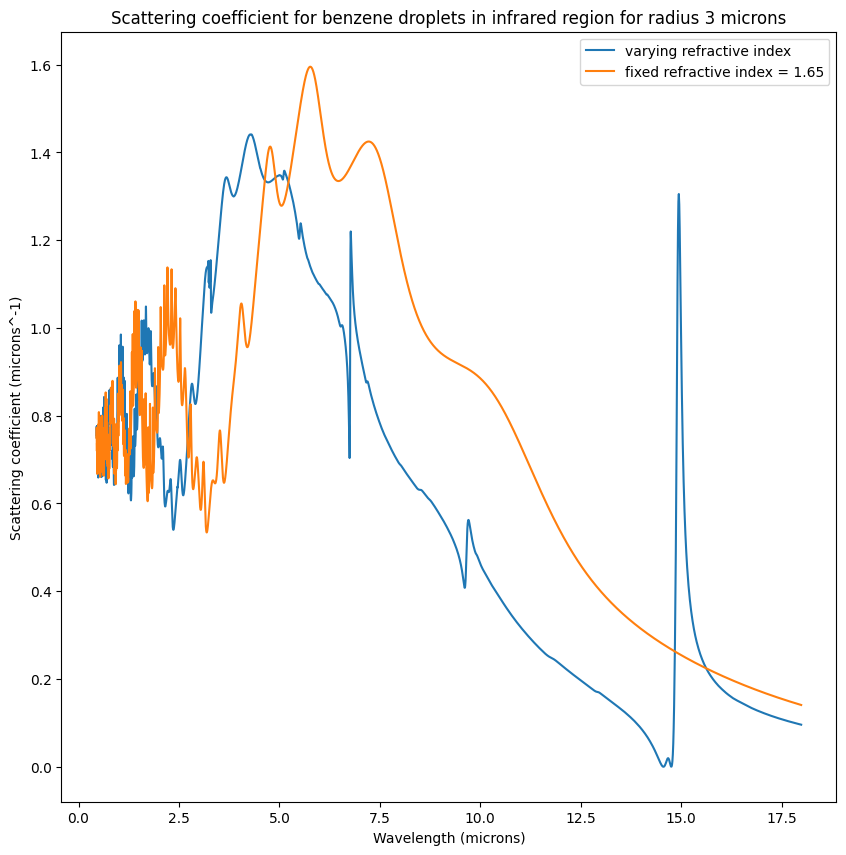

In [17]:
#Plot the scattering coefficient for all wavelengths
plt.figure(figsize=(10,10))
plt.xlabel('Wavelength (microns)')
plt.ylabel('Scattering coefficient (microns^-1)')

qsca, wavelength, sigma_s = get_scattering_coefficient(all_wavelengths,3,all_refractive_index)
#all_refractive_index is a numpy array with a fixed value for all wavelengths
constant_refractive_index = np.full(len(all_wavelengths),1.65)
qsca_1, wavelength_1, sigma_s_1 = get_scattering_coefficient(all_wavelengths,3,constant_refractive_index)
plt.title('Scattering coefficient for benzene droplets in infrared region for radius 3 microns')
plt.plot(all_wavelengths,sigma_s,label='varying refractive index')
plt.plot(all_wavelengths,sigma_s_1,label='fixed refractive index = 1.65')
plt.legend()